<a href="https://colab.research.google.com/github/dfariba/Aggregated-Wind-Farm-Power-Prediction-using-Statistical-Methods/blob/main/Naive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Aggregated Wind Farm Power Production Located in Belgium
Source of data: www.elia.be

Naive Model

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [ ]:
# Load dataset
df_power = pd.read_csv ('AggregatedWindFarm_Belgium.csv', header=0, parse_dates = [0])

In [ ]:
df_power.head()

,DateTime,Measured & upscaled [MW]
0,2023-01-01 00:00:00,4418.33
1,2023-01-01 00:15:00,4394.16
2,2023-01-01 00:30:00,4384.73
3,2023-01-01 00:45:00,4393.22
4,2023-01-01 01:00:00,4338.39


In [ ]:
df_power.tail()

,DateTime,Measured & upscaled [MW]
2971,2023-01-31 22:45:00,2673.72
2972,2023-01-31 23:00:00,2864.39
2973,2023-01-31 23:15:00,2908.05
2974,2023-01-31 23:30:00,2894.37
2975,2023-01-31 23:45:00,3003.24


In [ ]:
df_power['t'] = df_power ['Measured & upscaled [MW]'].shift(1)

In [ ]:
train_size =  int (df_power.shape[0]*0.8)

In [ ]:
new_train, new_test = df_power[1:df_power.shape[0]-7], df_power[df_power.shape[0]-7:]

In [ ]:
train_X, train_y = new_train['t'], new_train['Measured & upscaled [MW]']

In [ ]:
test_X, test_y =  new_test['t'], new_test['Measured & upscaled [MW]']

In [ ]:
new_prediction = test_X.copy()

In [ ]:
print (new_prediction)

2969    2170.83
2970    2405.15
2971    2557.44
2972    2673.72
2973    2864.39
2974    2908.05
2975    2894.37
Name: t, dtype: float64


In [ ]:
print (test_y)

2969    2405.15
2970    2557.44
2971    2673.72
2972    2864.39
2973    2908.05
2974    2894.37
2975    3003.24
Name: Measured & upscaled [MW], dtype: float64


In [ ]:
new_mse = mean_squared_error (test_y, new_prediction)

In [ ]:
new_mse

20274.315528571435

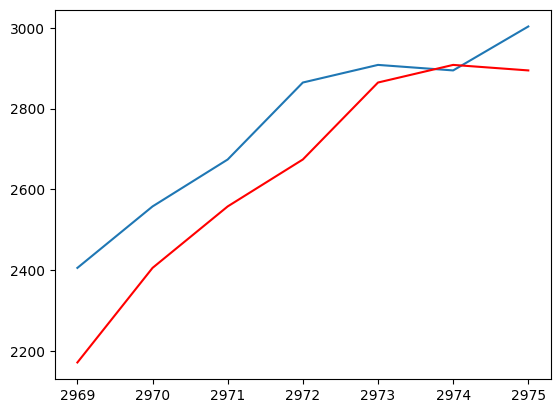

In [ ]:
# plot results
plt.plot (test_y)
plt.plot (new_prediction, color='red')